In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_test = pd.read_csv('test.csv')

In [3]:
df_test.shape

(127037, 11)

In [4]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [6]:
#dropping column of id and getting value counts for gender 
df_test.drop('id', axis=1, inplace=True)
df_test.Gender.value_counts()

Male      68236
Female    58801
Name: Gender, dtype: int64

In [7]:
# replace male with 0 and female with 1 
df_test.Gender.replace(to_replace = ['Male','Female'], value = [0,1], inplace=True)

In [10]:
#getting value counts for Vehicle age
df_test.Vehicle_Age.value_counts()

1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64

In [12]:
df_test.Vehicle_Age.replace(to_replace = ['< 1 Year','> 2 Years'], value = [2,2], inplace=True)
df_test.Vehicle_Age.replace(to_replace = ['1-2 Year'], value = [1], inplace=True)

In [13]:
df_test.Vehicle_Age.value_counts()

1    66699
2    60338
Name: Vehicle_Age, dtype: int64

In [15]:
# replace male with 0 and female with 1 
df_test.Vehicle_Damage.replace(to_replace = ['No','Yes'], value = [0,1], inplace=True)

### Now checking outliers for : Age, Region code, Annual_Premium, Policy_Sales_Channel and Vintage

<AxesSubplot:xlabel='Age'>

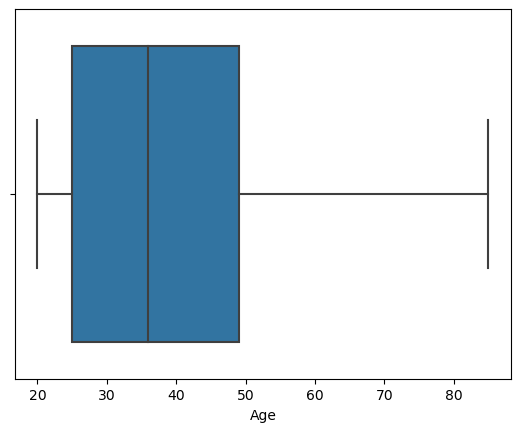

In [19]:
sns.boxplot(df_test['Age'])

<AxesSubplot:xlabel='Region_Code'>

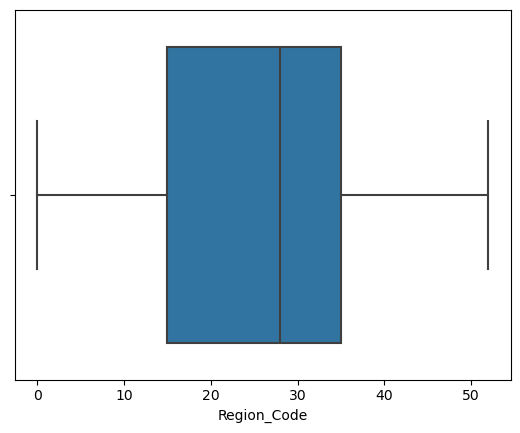

In [20]:
sns.boxplot(df_test['Region_Code'])

<AxesSubplot:xlabel='Annual_Premium'>

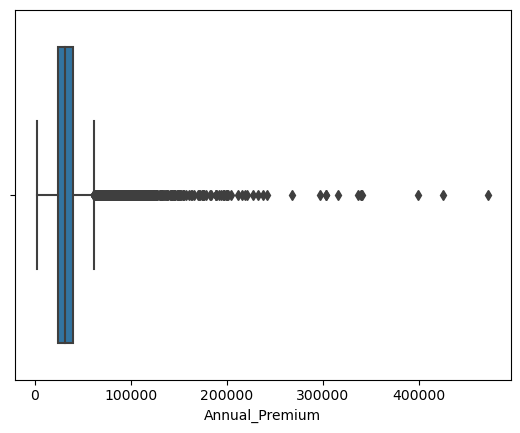

In [21]:
sns.boxplot(df_test['Annual_Premium'])

<AxesSubplot:xlabel='Policy_Sales_Channel'>

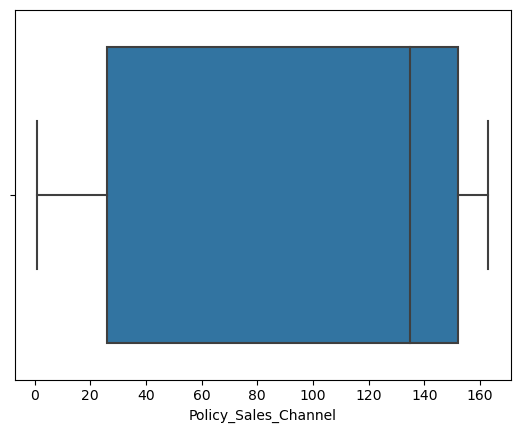

In [22]:
sns.boxplot(df_test['Policy_Sales_Channel'])

<AxesSubplot:xlabel='Vintage'>

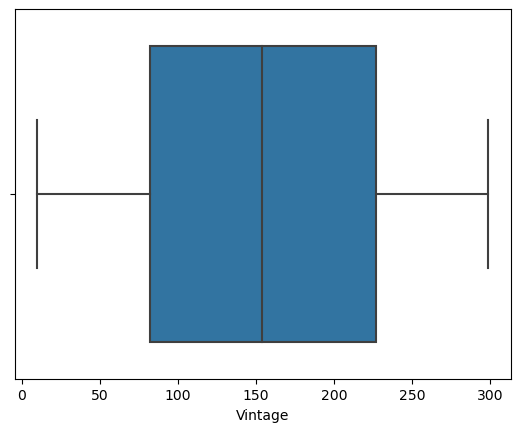

In [23]:
sns.boxplot(df_test['Vintage'])

#### outliers only exist in annual premium

In [36]:
def find_boundaries(df, variable, distance):
    Q1 =  df[variable].quantile(0.25)
    Q3 =  df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - (IQR * distance)
    upper_boundary = Q3 + (IQR * distance)
    return upper_boundary, lower_boundary

In [37]:
AP_UB, AP_LB = find_boundaries(df_test,'Annual_Premium',1.5)
AP_UB, AP_LB

(62032.5, 1700.5)

In [38]:
#creating a Boolean vector to flag the outliers in Annual_Premium
outliers_Annual_Premium = np.where(df_test['Annual_Premium'] > AP_UB, True,
                                   np.where(df_test['Annual_Premium'] < AP_LB, True,False))

In [39]:
df_test.shape #checking shape of df

(127037, 10)

In [40]:
df_test['Annual_Premium'][outliers_Annual_Premium].count()   # counting the outlier

3370

### Making NaN the outlier

In [43]:
df_test['AP_alt_trim'] = df_test.Annual_Premium[(df_test.Annual_Premium < AP_UB) & (df_test.Annual_Premium > AP_LB)]  # This is to the trim the outliers

In [51]:
df_test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,AP_alt_trim
0,0,25,1,11.0,1,2,0,35786.0,152.0,53,35786.0
1,0,40,1,28.0,0,1,1,33762.0,7.0,111,33762.0
2,0,47,1,28.0,0,1,1,40050.0,124.0,199,40050.0
3,0,24,1,27.0,1,2,1,37356.0,152.0,187,37356.0
4,0,27,1,28.0,1,2,0,59097.0,152.0,297,59097.0
...,...,...,...,...,...,...,...,...,...,...,...
127032,1,26,1,37.0,1,2,0,30867.0,152.0,56,30867.0
127033,1,38,1,28.0,0,1,1,28700.0,122.0,165,28700.0
127034,0,21,1,46.0,1,2,0,29802.0,152.0,74,29802.0
127035,0,71,1,28.0,1,1,0,62875.0,26.0,265,NaN


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  int64  
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  int64  
 6   Vehicle_Damage        127037 non-null  int64  
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
 10  AP_alt_trim           123667 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 10.7 MB


In [53]:
df_test.dropna(inplace=True)